# Defects Spotter 
### Date: 2021-03-10
### Author: Alexandre Ferraz dos Santos Sannibale
### Observations: 
* The model couldn't use the whole images because they were so big that  would take too long. 
* Images had to be reduced in size to (150,150)px. 
* The reduction removed too many features making the images all look the same. 
* Extensive preprocessing had to be done before the images were reduced to enhance the features. 
* Improvements to the lighting to remove shadows and bright spots, and removing the bar from the image entirely


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}

<IPython.core.display.Javascript object>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import cv2 as cv
import glob
from os.path import join as joinpath

2022-03-09 23:24:08.356047: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-09 23:24:08.356066: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### image_manager module: Auxiliary Functions for  retrieving image paths, reading, filtering and displaying images 

In [3]:
import image_manager as im

### Base pathing for images


In [4]:
!ls FiberglassPictures/Processed


3Categories_CNN_Model  anomalous_spots	ClassesSmall  pristine_spots
anomalous	       Classes		pristine


In [5]:
base_folder = joinpath(os.getcwd(),'FiberglassPictures')
processed_testing_base_folder  = joinpath(base_folder,"Processed/ClassesSmall/testing")
processed_training_base_folder = joinpath(base_folder,"Processed/ClassesSmall/training")

### Bug testing to check the number of classes of the model


In [6]:
base_path = processed_testing_base_folder
cats_names = os.listdir(base_path)
N          = 8 
images_path = []
print(cats_names)
for cat_name in cats_names:
  print("class:", cat_name)
  cat_filenames = os.listdir(joinpath(base_path,cat_name))
  images_path.append([joinpath(base_path,cat_name,s) for s in  cat_filenames[:N] ])

cats_number = len(cats_names)
print("number of classes:", cats_number)

['Anomalous', 'Bar', 'Clean']
class: Anomalous
class: Bar
class: Clean
number of classes: 3


### Convolution Neural Network Model

In [7]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(512, activation='relu'),

     tf.keras.layers.Dense(3, activation='softmax')
      ])

2022-03-09 23:24:09.899535: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.9/dist-packages/cv2/../../lib64:
2022-03-09 23:24:09.899559: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-09 23:24:09.899577: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alexandre-Lenovo-IdeaPad-FLEX-15IML): /proc/driver/nvidia/version does not exist
2022-03-09 23:24:09.899774: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [9]:
model.compile(optimizer= 'adam',loss= 'categorical_crossentropy', metrics=['acc'])

### Training and validation split


In [10]:
target_size = (150,150)
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        processed_training_base_folder,  
        target_size=target_size,  
        batch_size=32,
        color_mode="rgb",
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        processed_testing_base_folder, 
        target_size=target_size,  
        batch_size=6,
        color_mode="rgb",
        class_mode='categorical')

Found 153 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


### Model training and fitting


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=5,  
      epochs=12,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=5)

/tmp/ipykernel_21437/2509861818.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/12
5/5 [==============================] - 2s 288ms/step - loss: 0.7224 - acc: 0.7255 - val_loss: 0.4238 - val_acc: 0.9000
Epoch 2/12
5/5 [==============================] - 1s 254ms/step - loss: 0.2801 - acc: 0.9281 - val_loss: 0.2984 - val_acc: 0.9000
Epoch 3/12
5/5 [==============================] - 1s 252ms/step - loss: 0.1341 - acc: 0.9346 - val_loss: 0.1081 - val_acc: 0.9333
Epoch 4/12
5/5 [==============================] - 1s 250ms/step - loss: 0.0901 - acc: 0.9412 - val_loss: 0.1862 - val_acc: 0.9000
Epoch 5/12
5/5 [==============================] - 1s 252ms/step - loss: 0.0698 - acc: 0.9412 - val_loss: 0.1578 - val_acc: 0.9000
Epoch 6/12
5/5 [==============================] - 1s 253ms/step - loss: 0.0578 - acc: 0.9804 - val_loss: 0.2094 - val_acc: 0.9000
Epoch 7/12
5/5 [==============================] - 1s 253ms/step - loss: 0.0495 - acc: 0.9804 - val_loss: 0.6692 - val_acc: 0.8333
Epoch 8/12
5/5 [==============================] - 1s 259ms/step - loss: 0.0451 - acc: 0.98

In [12]:
# Do not run this block of code as it will overwrite the training of the model
#model.save(joinpath(base_folder,"2Categories_CNN_Model"))

In [13]:
os.listdir(joinpath(base_folder,"Processed","3Categories_CNN_Model"))

['saved_model.pb', 'variables', 'assets']

### Load model for classifying new images

In [14]:
from keras.models import load_model
from keras.preprocessing import image

model = load_model(joinpath(base_folder,"Processed","3Categories_CNN_Model"), compile = True)


### Retrieve image path for prediction

In [15]:
processed_training_images_location = im.set_of_images_location(processed_training_base_folder)
print("number of categories:", len(processed_training_images_location))

number of categories: 3


### Viewing image path and type of image in the processed training folder


In [16]:
processed_training_images_location[2][0]

'/home/alexandre/Documents/FiberglassDefectSpotter/FiberglassPictures/Processed/ClassesSmall/training/Clean/spots.33.jpg'

## Individual Predictions With the model
### Tested Class: Bar

Probability of being one of the three classes [Anomalous,Bar,Clean]:
 1 [0. 1. 0.]


<IPython.core.display.Javascript object>


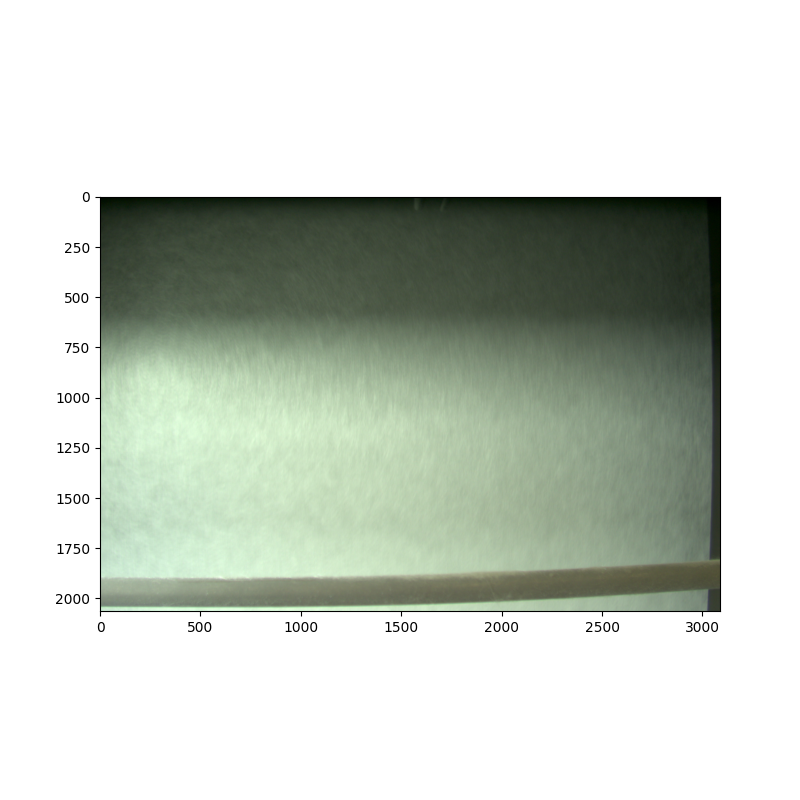

<IPython.core.display.Javascript object>


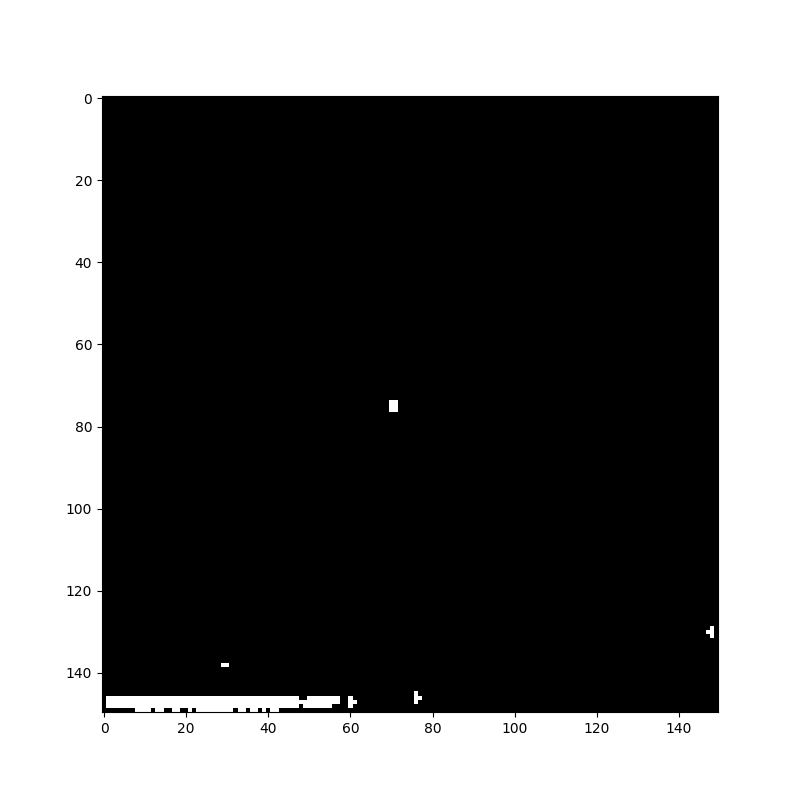

In [17]:
M = im.image_read(joinpath(base_folder,'02232021/23/f02232021-23-06-03-206260-228.jpg'))
M1= im.spots_detect_for_prediction(M)[0]
result = model.predict(M1)[0]
print("Probability of being one of the three classes [Anomalous,Bar,Clean]:\n",np.argmax(result),np.round(result,2))
im.image_show(M)
im.image_show(M1[0])

### Testing Class: Anomalous

Probability of being one of the three classes [Anomalous,Bar,Clean]:
 0 [1. 0. 0.]


<IPython.core.display.Javascript object>


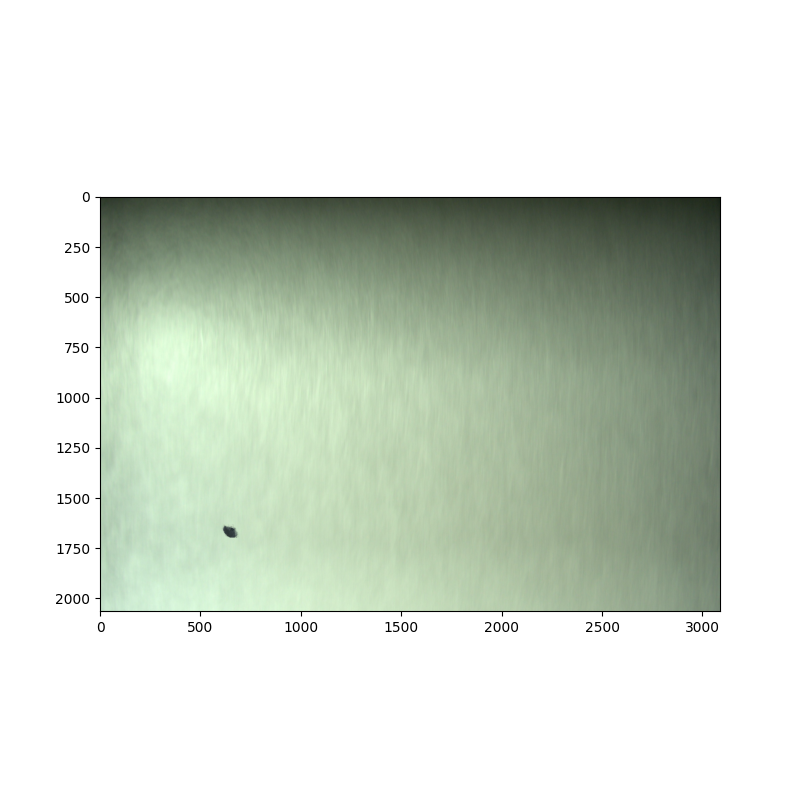

<IPython.core.display.Javascript object>


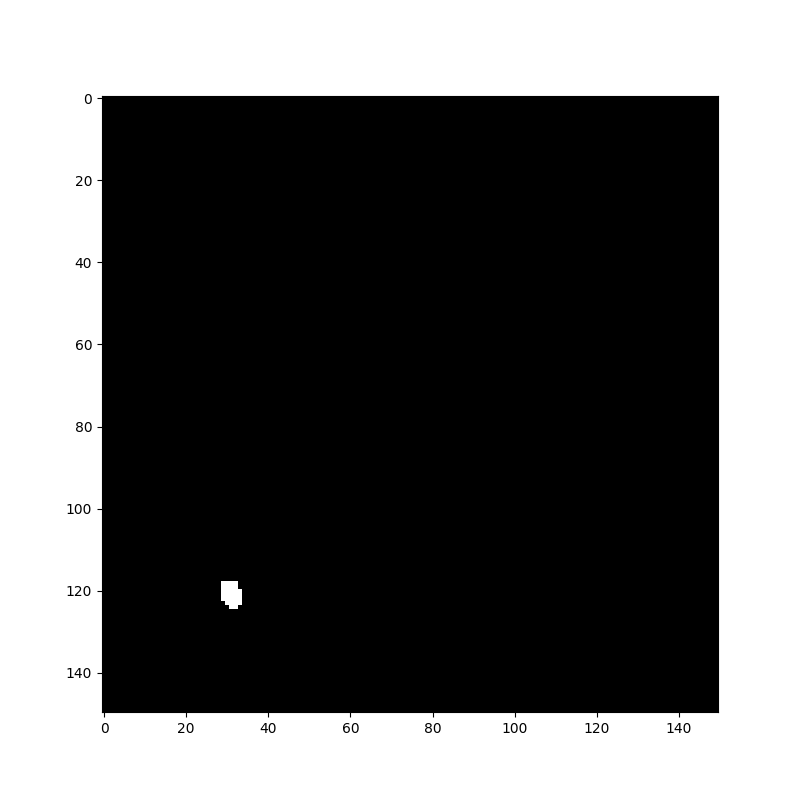

In [18]:
M = im.image_read(joinpath(base_folder,"02232021/defect/hole/2.jpg"))
M1= im.spots_detect_for_prediction(M)[0]
result = model.predict(M1)[0]
print("Probability of being one of the three classes [Anomalous,Bar,Clean]:\n", np.argmax(result),np.round(result,2))
im.image_show(M)
im.image_show(M1[0])

### Testing Class: Clean`

Probability of being one of the three classes [Anomalous,Bar,Clean]:
 2 [0.3  0.01 0.69]


<IPython.core.display.Javascript object>


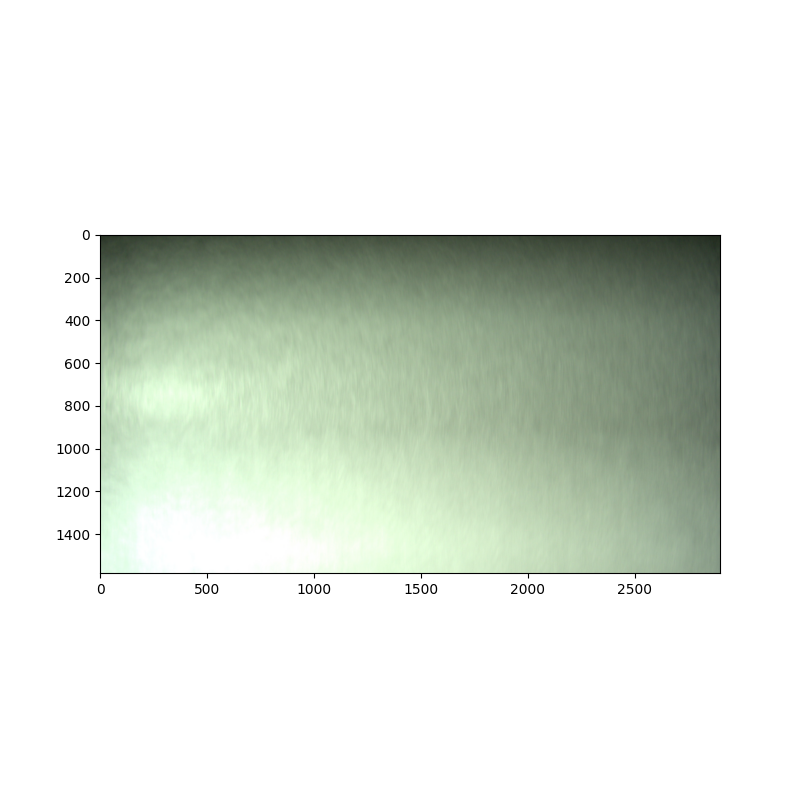

<IPython.core.display.Javascript object>


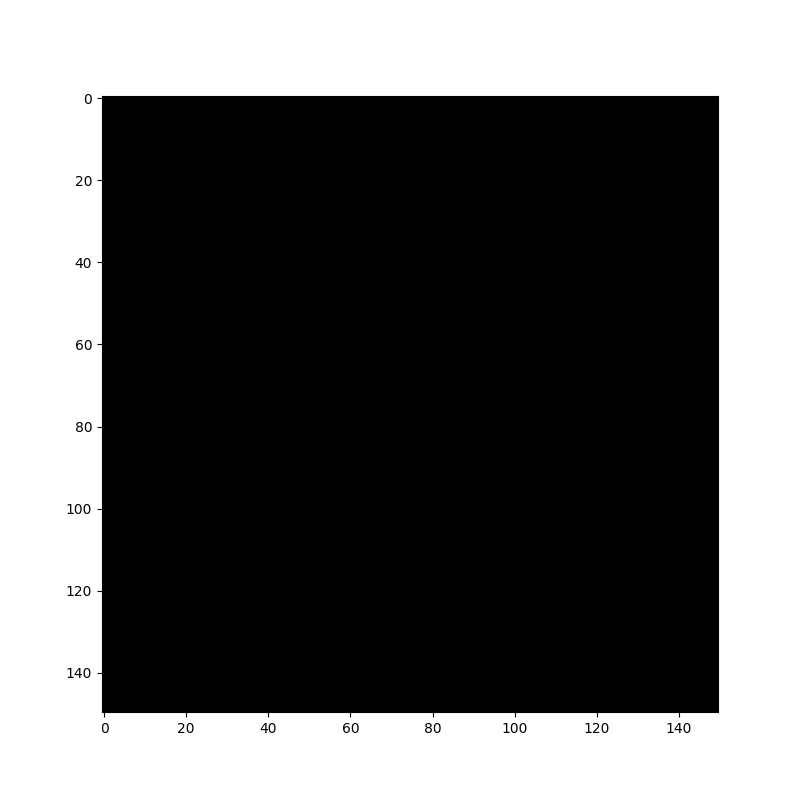

In [19]:
M = im.image_read(joinpath(base_folder,"02232021/cropped/cropped-11.png"))
M1= im.spots_detect_for_prediction(M)[0]
result = model.predict(M1)[0]
print("Probability of being one of the three classes [Anomalous,Bar,Clean]:\n", np.argmax(result),np.round(result,2))
im.image_show(M)
im.image_show(M1[0])


## Prediction testing in bulk
### Testing Class: Anomalous

In [20]:
print("Probability of being one of the three classes [Anomalous,Bar,Clean]:")
for image_location in processed_training_images_location[0]:
  M = im.image_read(image_location)
  #im.image_show(M)
  test_image = image.load_img(image_location, target_size = (150, 150)) 
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)

  #predict the result
  result = model.predict(test_image)[0]
  #print(np.round(result,2))
 
  print(np.argmax(result),np.round(result,2))

Probability of being one of the three classes [Anomalous,Bar,Clean]:
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
2 [0.3  0.01 0.69]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
2 [0.3  0.01 0.69]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
2 [0.3  0.01 0.69]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
0 [1. 0. 0.]
